In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from scipy.interpolate import interp1d

In [19]:
prisma_angle = np.pi / 3

In [20]:
data = pd.read_csv("data_podgon.csv")
data

,wave_length,angle,minuets,seconds
0,690.72,51,40,808
1,576.96,52,10,746
2,579.07,52,10,700
3,546.07,52,40,219
4,491.60,53,30,21
5,453.83,54,50,37
6,404.66,55,50,901


In [21]:
angles_radians = np.pi * (data.angle + data.minuets / 60 + data.seconds / 3600) / 180 
n = np.sin((prisma_angle + angles_radians) / 2) / np.sin(prisma_angle / 2)

In [22]:
data['n'] = n
data

,wave_length,angle,minuets,seconds,n
0,690.72,51,40,808,1.657012
1,576.96,52,10,746,1.661715
2,579.07,52,10,700,1.661591
3,546.07,52,40,219,1.665142
4,491.60,53,30,21,1.672628
5,453.83,54,50,37,1.685315
6,404.66,55,50,901,1.696869


In [57]:
data.to_markdown()

'|    |   wave_length |   angle |   minuets |   seconds |       n |\n|---:|--------------:|--------:|----------:|----------:|--------:|\n|  0 |        690.72 |      51 |        40 |       808 | 1.65701 |\n|  1 |        576.96 |      52 |        10 |       746 | 1.66172 |\n|  2 |        579.07 |      52 |        10 |       700 | 1.66159 |\n|  3 |        546.07 |      52 |        40 |       219 | 1.66514 |\n|  4 |        491.6  |      53 |        30 |        21 | 1.67263 |\n|  5 |        453.83 |      54 |        50 |        37 | 1.68531 |\n|  6 |        404.66 |      55 |        50 |       901 | 1.69687 |'

|    |   wave_length |   angle |   minuets |   seconds |       n | 
|---:|--------------:|--------:|----------:|----------:|--------:|
|  0 |        690.72 |      51 |        40 |       808 | 1.65701 |
|  1 |        576.96 |      52 |        10 |       746 | 1.66172 |
|  2 |        579.07 |      52 |        10 |       700 | 1.66159 |
|  3 |        546.07 |      52 |        40 |       219 | 1.66514 |
|  4 |        491.6  |      53 |        30 |        21 | 1.67263 |
|  5 |        453.83 |      54 |        50 |        37 | 1.68531 |
|  6 |        404.66 |      55 |        50 |       901 | 1.69687 |

In [23]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb
def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1
 
    if wave < 380:
        red, green, blue = 0, 0, 0
    elif wave < 440:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 490:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 510:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 580:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 645:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 780:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0
 
    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
 
    def f(c):
        if c == 0:
            return 0
        else:
            return  intensity_max * pow (c * factor, gamma)
 
    return f(red), f(green), f(blue)

### Дисперсионная кривая - рассчет $n_{D}, \ n_{F}, \ n_{C}$

- $n_{D}$ - для $\lambda_{D} = 589.3$
- $n_{F}$ - для $\lambda_{F} = 486.1$
- $n_{C}$ - для $\lambda_{C} = 656.3$

Линии через ближайшие точки

In [25]:
interpolation_f = interp1d(data.wave_length, data.n, kind = 'linear')

xAx = np.linspace(min(data.wave_length) + 0.01, max(data.wave_length) - 0.01, 1000)
interpolation = interpolation_f(xAx)

split_quantity = 200
interpolation_splitted = np.split(interpolation, split_quantity)
xAx_splitted = np.split(xAx, split_quantity)

Рассчет показателей преломления по интерполяции(для числа Аббе и среденей дисперсии)

In [26]:
names = ['D', 'F', 'C']
lambda_name = [589.3, 486.1, 656.3]
n_name = [interpolation_f(lamb) for lamb in lambda_name]


mean_disp = pd.DataFrame({'name': names,
                         'lambda': lambda_name,
                         'n': n_name})
mean_disp

,name,lambda,n
0,D,589.3,1.661171654961473
1,F,486.1,1.6744755361120607
2,C,656.3,1.6584234873843675


МНК по последним трём точкам(для рассчета разрешающей способности)

In [39]:
MNK = linregress(data[data.wave_length > 570]['wave_length'], data[data.wave_length > 570]['n']) 
print(MNK.slope)
print(MNK.stderr)
print(MNK.intercept)
print(MNK.intercept_stderr)

-4.1188725444498885e-05
2.858926393126942e-07
1.6854611957254313
0.00017664518020601205


In [40]:
xLine = np.linspace(500, 700, 1000)
yLine = MNK.slope * xLine + MNK.intercept
yLineUp = (MNK.slope + MNK.stderr) * xLine + MNK.intercept + MNK.intercept_stderr
yLineDown = (MNK.slope - MNK.stderr) * xLine + MNK.intercept - MNK.intercept_stderr

xLine_split = np.split(xLine, split_quantity)
yLine_split = np.split(yLine, split_quantity)
yLineUp_split = np.split(yLineUp, split_quantity)
yLineDown_split = np.split(yLineDown, split_quantity)

Построение дисперсионной кривой

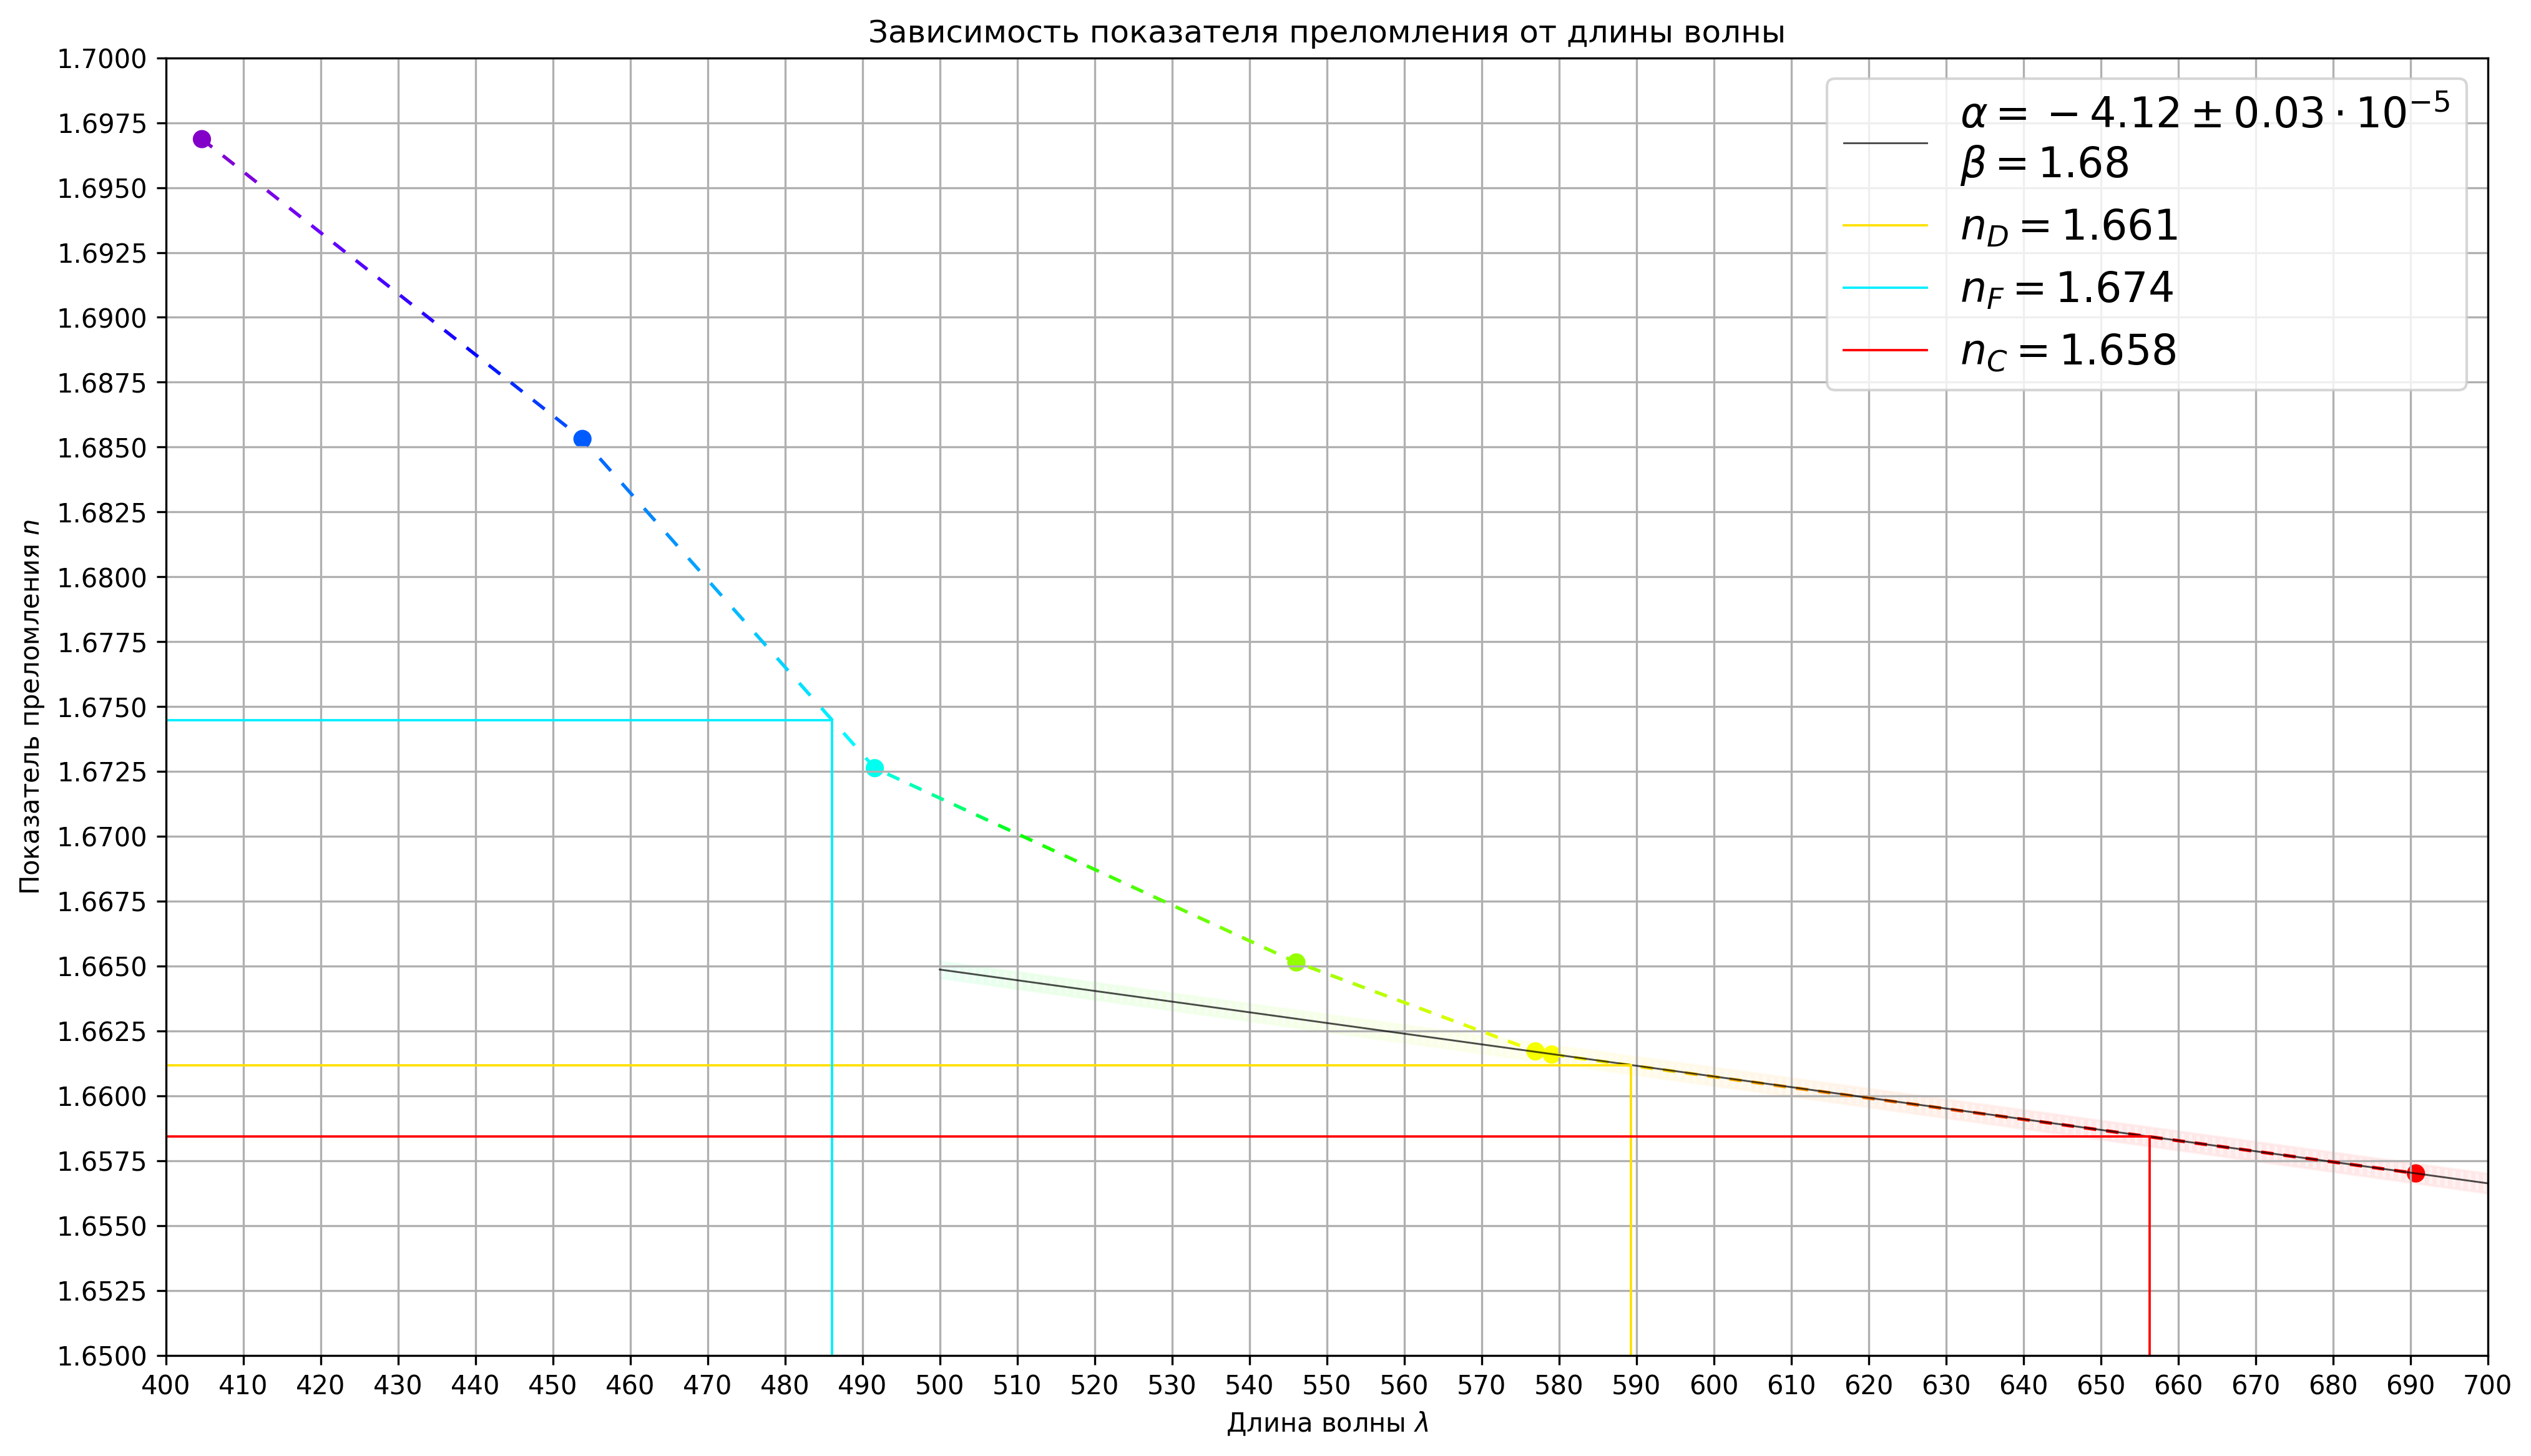

In [81]:
ylimDown, ylimUp = 1.65, 1.7
xLimLeft, xLimRight = 400, 700

plt.figure(figsize = (16, 9), dpi = 300)


plt.scatter(data.wave_length, 
             n, 
             c = [wave2rgb(length) for length in data.wave_length])

# plt.scatter([623.4], [interpolation_f(623.4)], color = wave2rgb(623.4))

for xAx_partion, interpolation_partion in zip(xAx_splitted[::2], interpolation_splitted[::2]):
    color = wave2rgb(xAx_partion.mean())
    plt.plot(xAx_partion, interpolation_partion, color = color, linewidth = 1.3)

for xAx_partion, yLine_partion, yLineUp_partion, yLineDown_partion in zip(xLine_split, yLine_split, yLineUp_split, yLineDown_split):
    color = wave2rgb(xAx_partion.mean())
    alpha = 0.1
    # plt.plot(xAx_partion, 
    #          yLine_partion,
    #          color = color,
    #          alpha = alpha)
    plt.fill_between(xAx_partion, 
                     yLineUp_partion,
                     yLineDown_partion,
                     color = color,
                     alpha = alpha/2)
plt.plot(xLine, 
         yLine, 
         label =  r'$\alpha = -4.12 \pm 0.03 \cdot 10^{-5}$' + '\n' + r'$\beta = 1.68$', 
         color = 'black', 
         alpha = 0.7,
         linewidth = 0.7)

for name in names:
    ymax = float(mean_disp[mean_disp.name == name]['n'])
    ymax -= ylimDown
    ymax /= (ylimUp - ylimDown)
    xmax = float(mean_disp[mean_disp.name == name]['lambda'])
    xmax -= xLimLeft
    xmax /= (xLimRight - xLimLeft)
    plt.axvline(float(mean_disp[mean_disp.name == name]['lambda']),
                ymin = 0,
                ymax = ymax,
                color = wave2rgb(float(mean_disp[mean_disp.name == name]['lambda'])),
                linewidth = 0.9)
    plt.axhline(float(mean_disp[mean_disp.name == name]['n']),
                color = wave2rgb(float(mean_disp[mean_disp.name == name]['lambda'])),
                linewidth = 0.9,
                xmax = xmax,
                xmin = 0,
                label = r'$n_{' + name + '} = ' + str(round(float(mean_disp[mean_disp.name == name]['n']), 3)) + '$')
    

plt.xlim(xLimLeft, xLimRight)
plt.ylim(ylimDown, ylimUp)
plt.xticks(np.arange(400, 710, 10))
plt.yticks(np.arange(1.65, 1.7, 0.0025))
plt.title("Зависимость показателя преломления от длины волны")
plt.legend(fontsize = 16)
plt.xlabel("Длина волны $\lambda$")
plt.ylabel("Показатель преломления $n$")
plt.grid()
plt.savefig("n_by_lambda_1.png")

Спектр призмы(бонус)

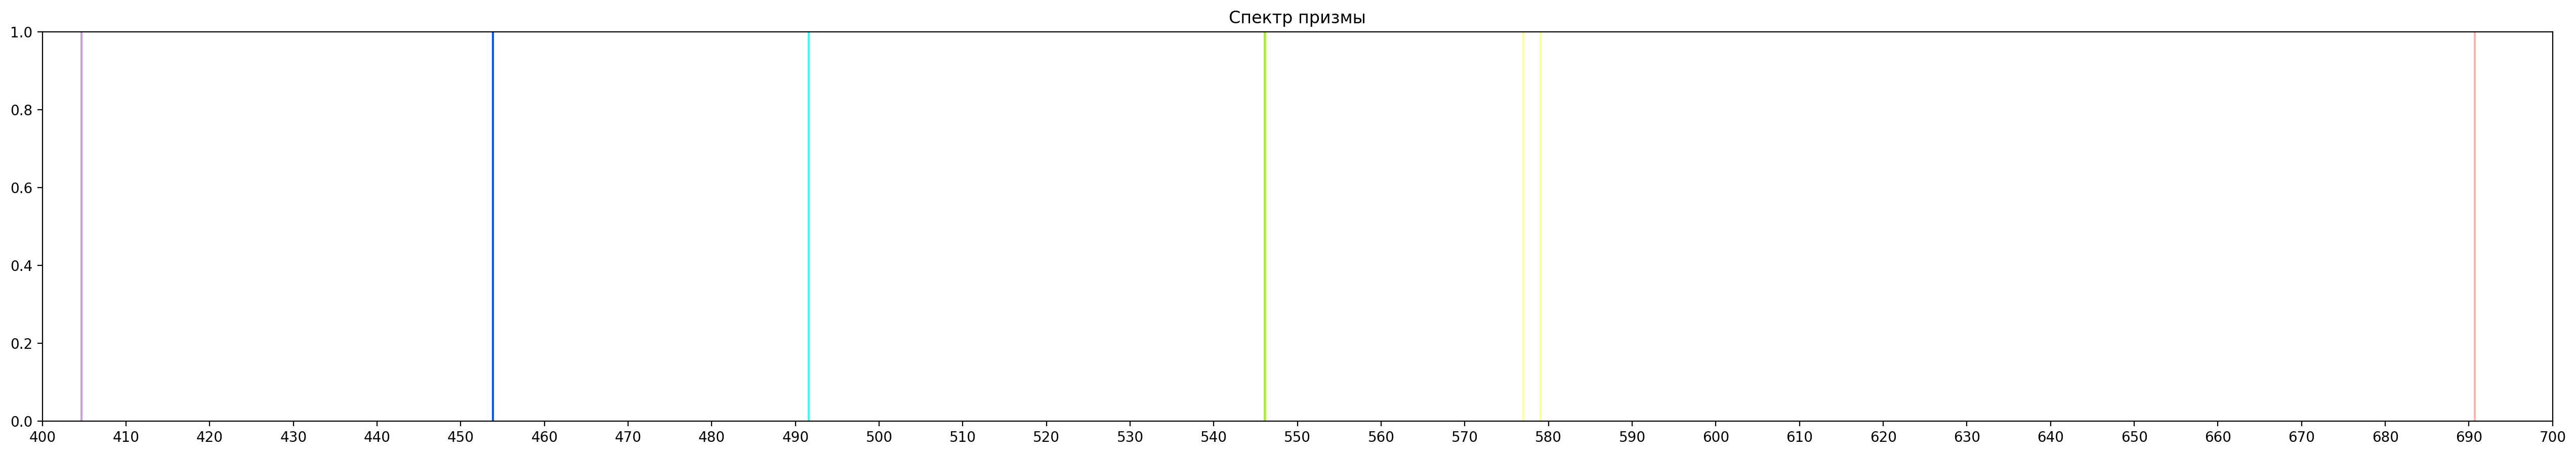

In [82]:
alpha_values = [3, 4, 4, 10, 8, 10, 4]

plt.figure(figsize = (32, 5), dpi = 200)

for alpha, lam in zip(alpha_values, data.wave_length):
    plt.axvline(lam, color = wave2rgb(lam), alpha = alpha / 10)

plt.title("Спектр призмы")
plt.xlim(400, 700)
plt.xticks(np.arange(400, 710, 10))
plt.savefig("spectrum.png")

Рассчет средней дисперсии и числа Аббе(мэ)

Средняя дисперсия:
$$
D = n_{F} - n_{C}
$$

Число Аббе(мэ):

$$
\nu = \frac{n_{D} - 1}{n_{F} - n_{C}}
$$

In [28]:
nu = (float(mean_disp[mean_disp.name == 'D']['n']) - 1) / (float(mean_disp[mean_disp.name == 'F']['n']) - float(mean_disp[mean_disp.name == 'C']['n']))
print(nu)

41.18923797065308


In [29]:
D = float(mean_disp[mean_disp.name == 'F']['n']) - float(mean_disp[mean_disp.name == 'C']['n'])
print(D)

0.01605204872769317


Рассчет разрешающей сопосбности

$$
R = b \frac{dn}{d \lambda}
$$

In [66]:
b = 7.2 / 100
R = b * MNK.slope / np.power(0.1, 9) 
print(R)

-2965.5882320039186
